### Rudimentary image segmentation algorithm

(291, 448) -1.0 1.0


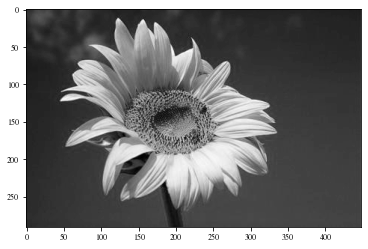

0.013784
0.040717
0.06571566666666667


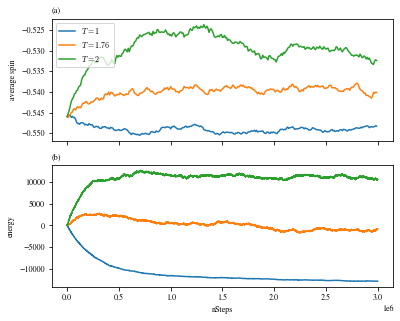

0.054317333333333336
0.021737333333333334


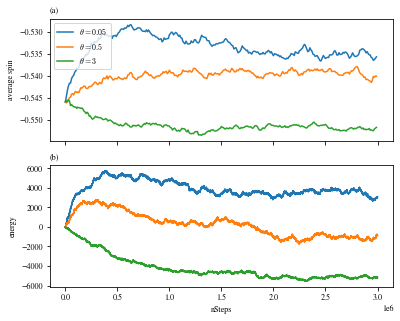

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from skimage import io
import skimage.color as color
import string
ast = list(string.ascii_lowercase)
from ising import *
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({"font.size": 8})
plt.rcParams.update({'axes.titlesize': 'medium'})
niter = int(3e6)
np.random.seed(1)
im = io.imread('segmentation_images/sunflower.png')
imgray = color.rgb2gray(im) 
imid = .5*(imgray.max()+imgray.min()) 
b = 2*(imgray-imid)/(imgray.max()-imgray.min())
Nx,Ny=b.shape
print(f'{b.shape} {b.min()} {b.max()}')
plt.imshow(b,cmap='gray')
plt.show()
temperatures = [1,1.76,2]
thetas = [0.05,3]
fig,ax = plt.subplots(2,1,figsize=(5.6, 4.5),sharex=True)
Xall = []
for i,T in enumerate(temperatures):

    X, energies, spins, ie, isp = metropolis(1, 0.5, b, T=T, niter = niter)
    Xall.append(X)
    print(len(ie)/niter)
    spins = np.array(spins) / (Nx*Ny)
    ax[0].plot(isp, spins, label = r'$T = {0}$'.format(T))
    ax[1].plot(ie, energies, label = r'$T = {0}$'.format(T))
    if i==1:
        ref = [isp, spins, ie, energies]
ax[0].legend(loc = 'best')
ax[1].set_xlabel('nSteps')
ax[0].set_ylabel('average spin')
ax[1].set_ylabel('energy')
ax[0].set_title(f'(a)', loc="left")
ax[1].set_title(f'(b)', loc="left")
plt.tight_layout()
#plt.savefig('spn_egy_T.pdf', bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(2,1,figsize=(5.6, 4.5),sharex=True)
for i,th in enumerate(thetas):
    if i:
        ax[0].plot(ref[0], ref[1], label = r'$\theta = 0.5$')
        ax[1].plot(ref[2], ref[-1])

    X, energies, spins, ie, isp = metropolis(1, th, b, T=1.76, niter = niter)
    Xall.append(X)
    print(len(ie)/niter)
    spins = np.array(spins) / (Nx*Ny)
    ax[0].plot(isp, spins, label = r'$\theta = {0}$'.format(th))
    ax[1].plot(ie, energies)
ax[0].legend(loc = 'best')
ax[1].set_xlabel('nSteps')
ax[0].set_ylabel('average spin')
ax[1].set_ylabel('energy')
ax[0].set_title(f'(a)', loc="left")
ax[1].set_title(f'(b)', loc="left")
plt.tight_layout()
#plt.savefig('spn_egy_th.pdf', bbox_inches='tight')
plt.show()

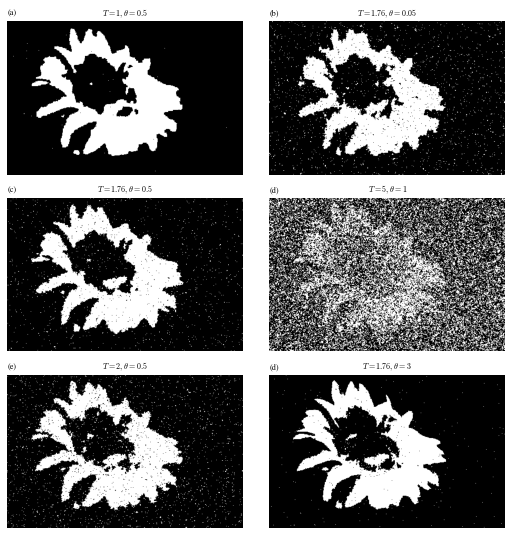

In [13]:
#X, energies, spins, ie, isp = metropolis(1, 1, b, T=5, niter = niter)
#Xall.append(X)
fig,ax = plt.subplots(3,2,figsize=(190/25.4, 190/25.4),sharex=True,sharey=True)
for i,T in enumerate(temperatures):
    ax[i,0].imshow(Xall[i],cmap='gray')
    ax[i,0].axis('off')
    ax[i,0].set_title(f'$T={temperatures[i]},'+r'\theta=0.5$')
    ax[i,0].set_title(f'({ast[2*i]})', loc="left")
ax[1,1].imshow(Xall[-1],cmap='gray')
ax[1,1].axis('off')
ax[1,1].set_title(r'$T=5,\theta=1$')
ax[1,1].set_title(f'({ast[3]})', loc="left")
for i,th in enumerate(thetas):
    ax[2*i,1].imshow(Xall[i+3],cmap='gray')
    ax[2*i,1].axis('off')
    ax[2*i,1].set_title(r'$T=1.76,\theta='+f'{th}$')
    ax[2*i,1].set_title(f'({ast[2*i+1]})', loc="left")
plt.tight_layout()
plt.savefig('segment.pdf', bbox_inches='tight')
plt.show()

### The Traveling Salesman Problem.

In [1]:
import numpy as np
from random import shuffle
from annealing import *
n_pts = 12
dr = (2 * np.pi) / n_pts

xy = []
D = np.zeros((n_pts,n_pts))
for i in range(0,n_pts):
    radians = dr * (i+0.5)  
    xy.append([np.cos(radians), np.sin(radians)])
    if i>0:
        for j in range(i):
            D[j,i]=dist(xy[j],xy[i])
D = (D+D.T)/2
x0 = np.arange(1,n_pts)
shuffle(x0)

p = np.repeat([0,2,1,3],3)
x0 = neighbor_tour(neighbor_tour(initial_tour(p)))

T0 = 2
alpha = 0.8
stopping_temp = 1e-8
max_iter = 300

best_tour,best_cost,cost, acceptr = simulated_annealing(D, p, T0, alpha, stopping_temp, max_iter, x0)

print("Best tour:", best_tour)
print("Objective function value:", tour_cost(best_tour, D))

Best tour: [(0, 0), (1, 0), (2, 0), (3, 2), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 3), (10, 3), (11, 3), (0, 0)]
Objective function value: 3.105828541230249


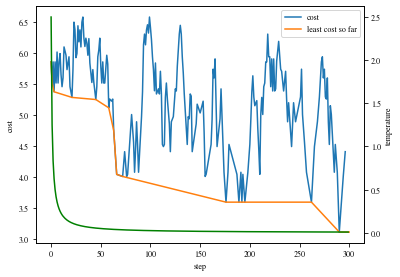

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({"font.size": 8})
plt.rcParams.update({'axes.titlesize': 'medium'})
fig,ax=plt.subplots(figsize=(5.6, 3.9))
ax.plot(cost[:,0],cost[:,1],label='cost')
ax.plot(best_cost[:,0],best_cost[:,1],label='least cost so far')
ax.set_ylabel('cost')
ax.set_xlabel('step')
ax2 = ax.twinx()
ax2.plot(np.arange(max_iter),T0 / (0.8*np.arange(1,max_iter+1)),c='g')
ax2.set_ylabel('temperature')
ax.legend()
plt.tight_layout()
plt.savefig('ctsp_iter.pdf', bbox_inches='tight')
plt.show()

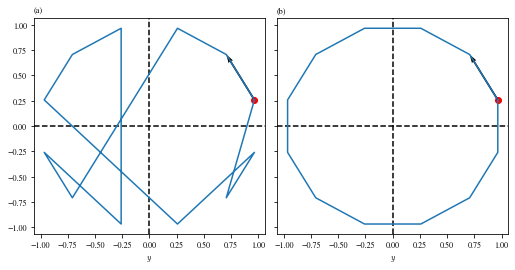

In [11]:
x0 = [xi[0] for xi in x0]
xb = [xi[0] for xi in best_tour]
fig,ax=plt.subplots(1,2,figsize=(7.2,3.8),sharey=True)
for i in range(2):
    ax[i].scatter(xy[0][0],xy[0][1],c='r')
    ax[i].axhline(0,ls='--',c='k')
    ax[i].axvline(0,ls='--',c='k')
    ax[i].set_xlabel(r'$x$')
    ax[i].set_xlabel(r'$y$')
ax[0].plot(np.array(xy)[x0,0],np.array(xy)[x0,1])
ax[0].quiver(xy[0][0],xy[0][1], xy[x0[1]][0]-xy[0][0], xy[x0[1]][1]-xy[0][1],
             scale_units='xy', angles='xy', scale=1)
ax[1].plot(np.array(xy)[xb,0],np.array(xy)[xb,1])
ax[1].quiver(xy[0][0],xy[0][1], xy[xb[1]][0]-xy[0][0], xy[xb[1]][1]-xy[0][1],
             scale_units='xy', angles='xy', scale=1)
ax[0].set_title(f'(a)', loc="left")
ax[1].set_title(f'(b)', loc="left")
plt.tight_layout()
plt.savefig('ctsp_map.pdf', bbox_inches='tight')
plt.show()